In [3]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=dae1b7496d6786a62714ddf047f53185e4ac13891ba2bb4f85601bbc00120e7a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [6]:
from turtle import bgcolor
import numpy as np
from matplotlib import pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control


In [7]:
hum_ambiente_x = np.arange(0, 100, 1) # dominio humedad ambiente [1..100] -- ux
temp_ambiente_x = np.arange(-40, 100, 1) # dominio temperatura ambiente -- uy
hum_suelo_x = np.arange(0, 1023, 1) # dominio humedad del suelo -- uz
nivel_agua_x = np.arange(2, 99, 1) # dominio del nivel del agua

flujo_agua_x = np.arange(0, 31, 1) # dominio de flujo de agua

In [8]:
hum_ambiente = control.Antecedent(hum_ambiente_x,'Humedad ambiente')
temp_ambiente = control.Antecedent(temp_ambiente_x,'Temperatura ambiente')
hum_suelo = control.Antecedent(hum_suelo_x,'Humedad suelo')
nivel_agua = control.Antecedent(nivel_agua_x, 'Nivel agua')

flujo_agua = control.Consequent(flujo_agua_x,'Flujo agua')

In [9]:
hum_ambiente['seco'] = fuzz.trapmf(hum_ambiente_x, [0, 0, 20, 40])
hum_ambiente['normal'] = fuzz.trimf(hum_ambiente_x, [30, 55, 80])
hum_ambiente['humedo'] = fuzz.trapmf(hum_ambiente_x, [70, 90, 100, 100])


temp_ambiente['frio'] = fuzz.trapmf(temp_ambiente_x, [-40, -40, 10, 20])
temp_ambiente['templado'] = fuzz.trimf(temp_ambiente_x, [10, 25, 40])
temp_ambiente['caluroso'] = fuzz.trapmf(temp_ambiente_x, [30, 40, 100, 100])

hum_suelo['saturado'] = fuzz.trapmf(hum_suelo_x, [0, 0, 200, 400])
hum_suelo['humedo'] = fuzz.trimf(hum_suelo_x, [300, 550, 800])
hum_suelo['seco'] = fuzz.trapmf(hum_suelo_x, [700, 900, 1023, 1023])

nivel_agua['lleno'] = fuzz.trapmf(nivel_agua_x, [1, 1, 60, 80])
nivel_agua['vacio'] = fuzz.trapmf(nivel_agua_x, [60, 80, 100, 100])

flujo_agua['no'] = fuzz.sigmf(flujo_agua_x, 15, -1)
flujo_agua['si'] = fuzz.sigmf(flujo_agua_x, 15, 1)

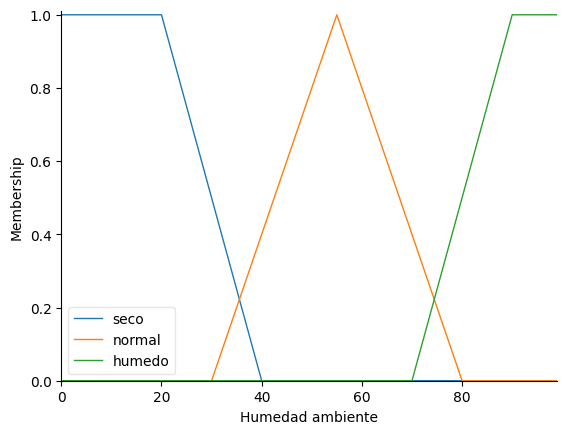

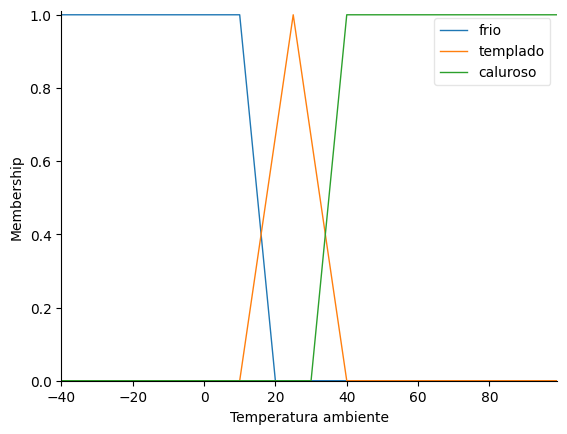

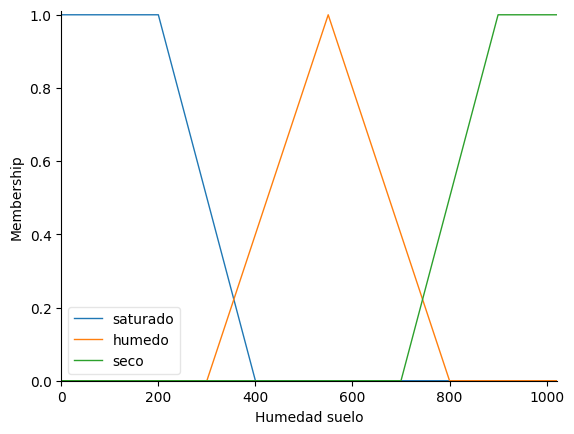

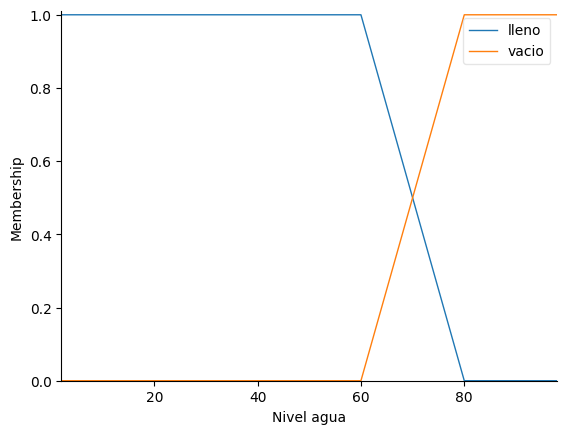

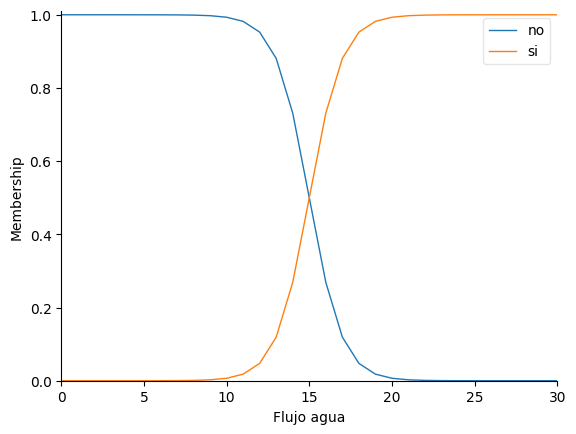

In [10]:
hum_ambiente.view()
temp_ambiente.view()
hum_suelo.view()
nivel_agua.view()

flujo_agua.view()

In [11]:
regla1 = control.Rule(hum_ambiente['seco'] & temp_ambiente['caluroso'] & hum_suelo['seco'], flujo_agua['si'])
regla2 = control.Rule(hum_ambiente['seco'] & temp_ambiente['templado'] & hum_suelo['seco'], flujo_agua['si'])
regla3 = control.Rule(hum_suelo['saturado'], flujo_agua['no'])
regla4 = control.Rule(hum_suelo['seco'], flujo_agua['si'])
regla5 = control.Rule(hum_ambiente['seco'] & temp_ambiente['caluroso'] & hum_suelo['humedo'], flujo_agua['si'])
regla6 = control.Rule(hum_ambiente['seco'] & temp_ambiente['templado'] & hum_suelo['humedo'], flujo_agua['si'])
regla7 = control.Rule(hum_ambiente['seco'] & temp_ambiente['frio'] & hum_suelo['humedo'], flujo_agua['si'])
regla8 = control.Rule(hum_suelo['humedo'], flujo_agua['si'])
regla9 = control.Rule(nivel_agua['lleno'], flujo_agua['si'])
regla10 = control.Rule(nivel_agua['vacio'], flujo_agua['no'])

In [12]:
SE_control = control.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9,regla10])
SE = control.ControlSystemSimulation(SE_control)

15.748440959771036


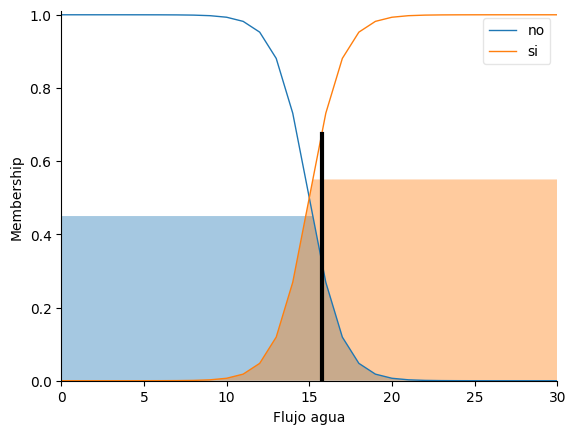

In [13]:
SE.input['Humedad suelo']=350
SE.input['Temperatura ambiente']=10
SE.input['Humedad ambiente']=22
SE.input['Nivel agua']=69

SE.compute()
print (SE.output['Flujo agua'])
flujo_agua.view(sim=SE)


12.791375107101839


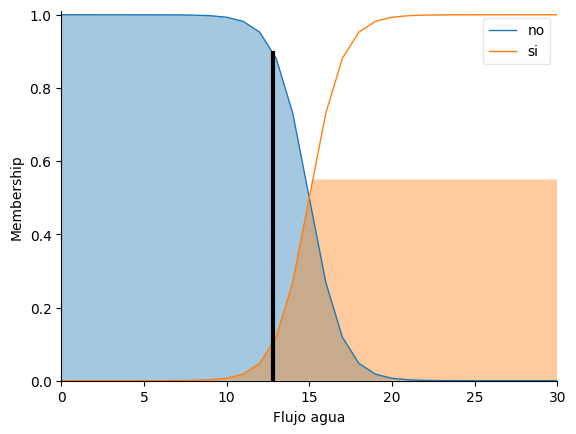

In [14]:

SE.input['Humedad suelo']=200
SE.input['Temperatura ambiente']=30
SE.input['Humedad ambiente']=60
SE.input['Nivel agua']=69

SE.compute()
print (SE.output['Flujo agua'])
flujo_agua.view(sim=SE)